In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Decision Trees

## 1. Explore

In [3]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")
gpa.head()

#(ggplot(gpa, aes()) + geom_bar())

,fraud,home,amount,cashBack
0,0,1,81.217853,0
1,0,1,67.879223,0
2,0,1,75.989902,0
3,0,1,67.462833,0
4,0,0,62.610021,0


## 2. Build Model

In [4]:
#separate X and Y values in our data frame
X = gpa[["home","amount","cashBack"]] #predictor variables
y = gpa["fraud"] #predicting

#model validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Zscore our continuous variables
zscore = StandardScaler()
zscore.fit(X_train[["amount"]])

X_train["amount"] = zscore.transform(X_train[["amount"]])
X_test["amount"] = zscore.transform(X_test[["amount"]])

#creating the model
tree = DecisionTreeClassifier()
#fitting the model with training data
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 3. Evaluate Model

In [6]:
y_pred = tree.predict(X_test) #predicted values

accuracy_score(y_pred, y_test)

0.8

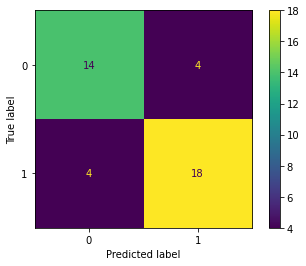

In [7]:
plot_confusion_matrix(tree,X_test,y_test)
#main diagonal are the correctly predicted instances

## Looking more into our tree and playing around

In [9]:
#how many layers the decision tree has (at its deepest point)
tree.get_depth()

7

In [10]:
#how many leaf nodes we have
tree.get_n_leaves()

27

In [11]:
#how well does our model do on unseen data
#limit the maximum depth of our tree: the deeper the tree, the more overfit the 
#    model maybe to the training data

tree = DecisionTreeClassifier(max_depth = 5) #limit depth of tree
tree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [12]:
#do all the things we did before

y_pred = tree.predict(X_test) #predicted values

accuracy_score(y_pred, y_test) #accuracy score

0.775

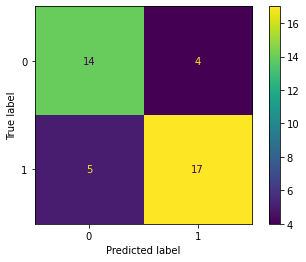

In [13]:
plot_confusion_matrix(tree,X_test,y_test)

In [14]:
tree.get_depth() #same as the maximum we allowed it!

5

In [13]:
#variable importance = way of measuring how influential each predictor variable 
#    is in the model 
#how much does our model improve with the addition of that feature
tree.feature_importances_

array([0.08974119, 0.86600393, 0.04425488])

# Another Example

In [15]:
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


[0.5526315789473685, 0.618421052631579, 0.5921052631578947, 0.6533333333333333]
0.6041228070175438
[12, 13, 18, 18]


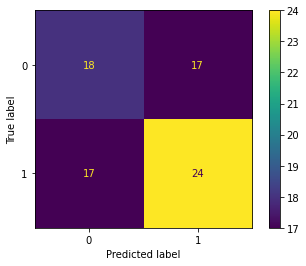

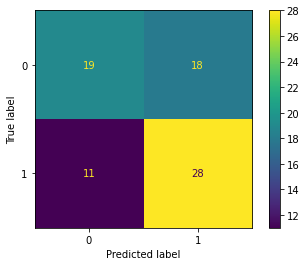

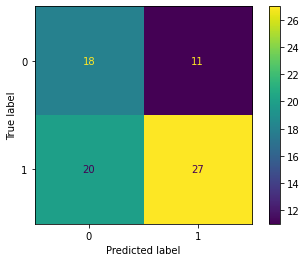

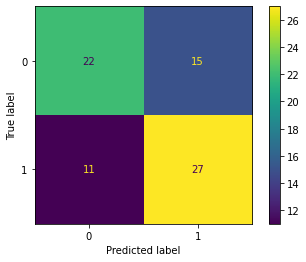

In [16]:
# using K-Fold Cross Validation

predictors = ["sex", "age", "restecg", "chol"]

X = heart[predictors]
y = heart["target"]

kf = KFold(4, shuffle = True)
#shuffle takes all the rows in our data frame and shuffles them before making the folds
#   more likely that the folds have a combination of the outcome

acc = []
depth = []

#loop through each of the folds in our cross validation
for train, test in kf.split(X):
    #grab training and test data
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    #zscore continuous variables only after the split to prevent data leakage
    z = StandardScaler()
    X_train[["age", "chol"]] = z.fit_transform(X_train[["age", "chol"]])
    X_test[["age", "chol"]] = z.transform(X_test[["age", "chol"]])
    
    #create the model and fit it to the training data
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)

    #grab any metric we think is important
    acc.append(tree.score(X_test,y_test))
    depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree,X_test,y_test)

print(acc)
print(np.mean(acc))
print(depth)